## Project Description

The amount of CO2 emission from the transport sector (including cars) accounts for about 20% of total CO2 emissions. Accordingly, from the viewpoint of preventing global warming, reducing that proportion is a key issue. In regard to CO2 emissions from cars, fuel economy standards are getting tougher all over the world, so improving the fuel economy of cars is strongly desired.
              This dataset captures the details of how CO2 emissions by a vehicle can vary with the different features. The dataset contains data over a period of 7 years. There are total 7385 rows and 12 columns. There are few abbreviations that has been used to describe the features. 

### Content

#### 4WD/4X4 = Four-wheel drive
#### AWD = All-wheel drive
#### FFV = Flexible-fuel vehicle
#### SWB = Short wheelbase
#### LWB = Long wheelbase
#### EWB = Extended wheelbase

### Transmission

#### A = Automatic
#### AM = Automated manual
#### AS = Automatic with select shift
#### AV = Continuously variable
#### M = Manual
#### 3 - 10 = Number of gears

### Fuel type

#### X = Regular gasoline
#### Z = Premium gasoline
#### D = Diesel
#### E = Ethanol (E85)
#### N = Natural gas
#### Fuel Consumption

City and highway fuel consumption ratings are shown in litres per 100 kilometres (L/100 km) - the combined rating (55% city, 45% hwy) is shown in L/100 km and in miles per gallon (mpg) CO2 Emissions. The tailpipe emissions of carbon dioxide (in grams per kilometre) for combined city and highway driving

## Solution Requirement:

Significantly reducing CO2 emissions from cars will not be easy, but the available data can be used to extract the features, know the behavior of cars, and try to reduce the emissions. Machine Learning techniques can be used in this regard. 

## Exploratory Data Analysis (EDA)
Objective of EDA :
1. To check for missing data and other anamolies.
2. To gain maximum insight into the data set and its underlying structure.
3. To check the distribution of the data.
4. Identify the most influential variables.

### Importing the Libraries

In [84]:
import pandas as pd
import numpy as np
from numpy import percentile
from scipy import stats
from scipy.stats import skew
from scipy.special import boxcox1p
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (15, 8)

In [5]:
df = pd.read_csv("CO2 Emissions_Data.csv")

In [5]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [6]:
df.info

<bound method DataFrame.info of        Make        Model   Vehicle Class  Engine Size(L)  Cylinders  \
0     ACURA          ILX         COMPACT             2.0          4   
1     ACURA          ILX         COMPACT             2.4          4   
2     ACURA   ILX HYBRID         COMPACT             1.5          4   
3     ACURA      MDX 4WD     SUV - SMALL             3.5          6   
4     ACURA      RDX AWD     SUV - SMALL             3.5          6   
...     ...          ...             ...             ...        ...   
7380  VOLVO  XC40 T5 AWD     SUV - SMALL             2.0          4   
7381  VOLVO  XC60 T5 AWD     SUV - SMALL             2.0          4   
7382  VOLVO  XC60 T6 AWD     SUV - SMALL             2.0          4   
7383  VOLVO  XC90 T5 AWD  SUV - STANDARD             2.0          4   
7384  VOLVO  XC90 T6 AWD  SUV - STANDARD             2.0          4   

     Transmission Fuel Type  Fuel Consumption City (L/100 km)  \
0             AS5         Z                       

In [7]:
df.shape

(7385, 12)

In [9]:
df.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')


#### 1. There are total 7385 row/samples and 12 columns/features.
#### 2. 11 of the features are predictor and one is regressor
#### 3. 5 of the 12 column are of object datatype, 3 integer and 4 are float type.
#### 4. We can see that there are total 7 columns with numerical values and other 5 have character values.
#### 5. The columns Engine Size(L), Cylinders, Fuel Consumption City (L/100 km), Fuel Consumption Hwy (L/100 km), Fuel Consumption Comb (L/100 km), Fuel Consumption Comb (mpg) and CO2 Emissions(g/km) are numerical and continuous in nature.
#### 6. The columns Make, Model, Vehicle Class, Transmission and Fuel Type are categorical in nature.


## Exploratory Data Analysis

In [49]:
#Renaming the coumns with more meaningful name
df.rename(columns ={'Make' : "make",
                    'Model' : "model",
                    'Vehicle Class' :  "vehicle_class",
                    'Engine Size(L)': "engine_size",
                    'Cylinders': "cylinders",
                   'Transmission' : "transmission",
                    'Fuel Type' : "fuel_type",
                    'Fuel Consumption City (L/100 km)' : "fuel_cons_city",
                   'Fuel Consumption Hwy (L/100 km)': "fuel_cons_hwy",
                    'Fuel Consumption Comb (L/100 km)' :"fuel_cons_comb",
                   'Fuel Consumption Comb (mpg)' : "fuel_cons_comb_mpg"
                    , 'CO2 Emissions(g/km)' : "co2"
                   }, inplace = True)

In [52]:
#Getting insight of the Categorical Data
df["make"].nunique()

42

In [53]:
df["model"].nunique()

2053

In [54]:
df["vehicle_class"].nunique()

16

In [55]:
df["transmission"].nunique()

27

In [56]:
df["fuel_type"].nunique()

5


#### 1. There are total 42 types of car brand.
#### 2. There are total 2053 unique car model. These neither can be converted into any dummy variable nor it can be used for analysis. So we can drop this column.
#### 3. There are total 16 types of vehicle class basis on their gross vehicle weight rating (GVWR) and volume index. But there are no data available with exact GVWR or volume index value, so that we can categorise the similar vehicle into a same group.
#### 4. The 27 type of transmission has been clubed into 5 different transmission without taking the number of clutches into account, as they doesnot affect CO2 emissions.
#### 5. The 5 type of Fuel Types has been renamed so that it has some meaningful interpretation.¶


In [58]:
#Finding Null Values in the dataset
df.isnull().sum()

make                  0
model                 0
vehicle_class         0
engine_size           0
cylinders             0
transmission          0
fuel_type             0
fuel_cons_city        0
fuel_cons_hwy         0
fuel_cons_comb        0
fuel_cons_comb_mpg    0
co2                   0
dtype: int64

In [15]:
#Finding duplicate values in the dataset
df.duplicated().sum()

1103

In [16]:
#dropping duplicate values
df.drop_duplicates(inplace=True)

In [20]:
#correlation between different variables
df.corr()

,engine_size,cylinders,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,fuel_cons_comb_mpg,co2
engine_size,1.000000,0.928843,0.834228,0.766817,0.820146,-0.762955,0.854802
cylinders,0.928843,1.000000,0.801277,0.717647,0.781099,-0.723731,0.834687
fuel_cons_city,0.834228,0.801277,1.000000,0.950811,0.994052,-0.927640,0.918756
fuel_cons_hwy,0.766817,0.717647,0.950811,1.000000,0.978607,-0.891892,0.883424
fuel_cons_comb,0.820146,0.781099,0.994052,0.978607,1.000000,-0.925801,0.916840
fuel_cons_comb_mpg,-0.762955,-0.723731,-0.927640,-0.891892,-0.925801,1.000000,-0.906783
co2,0.854802,0.834687,0.918756,0.883424,0.916840,-0.906783,1.000000


### Frequency Distribution of different Variables

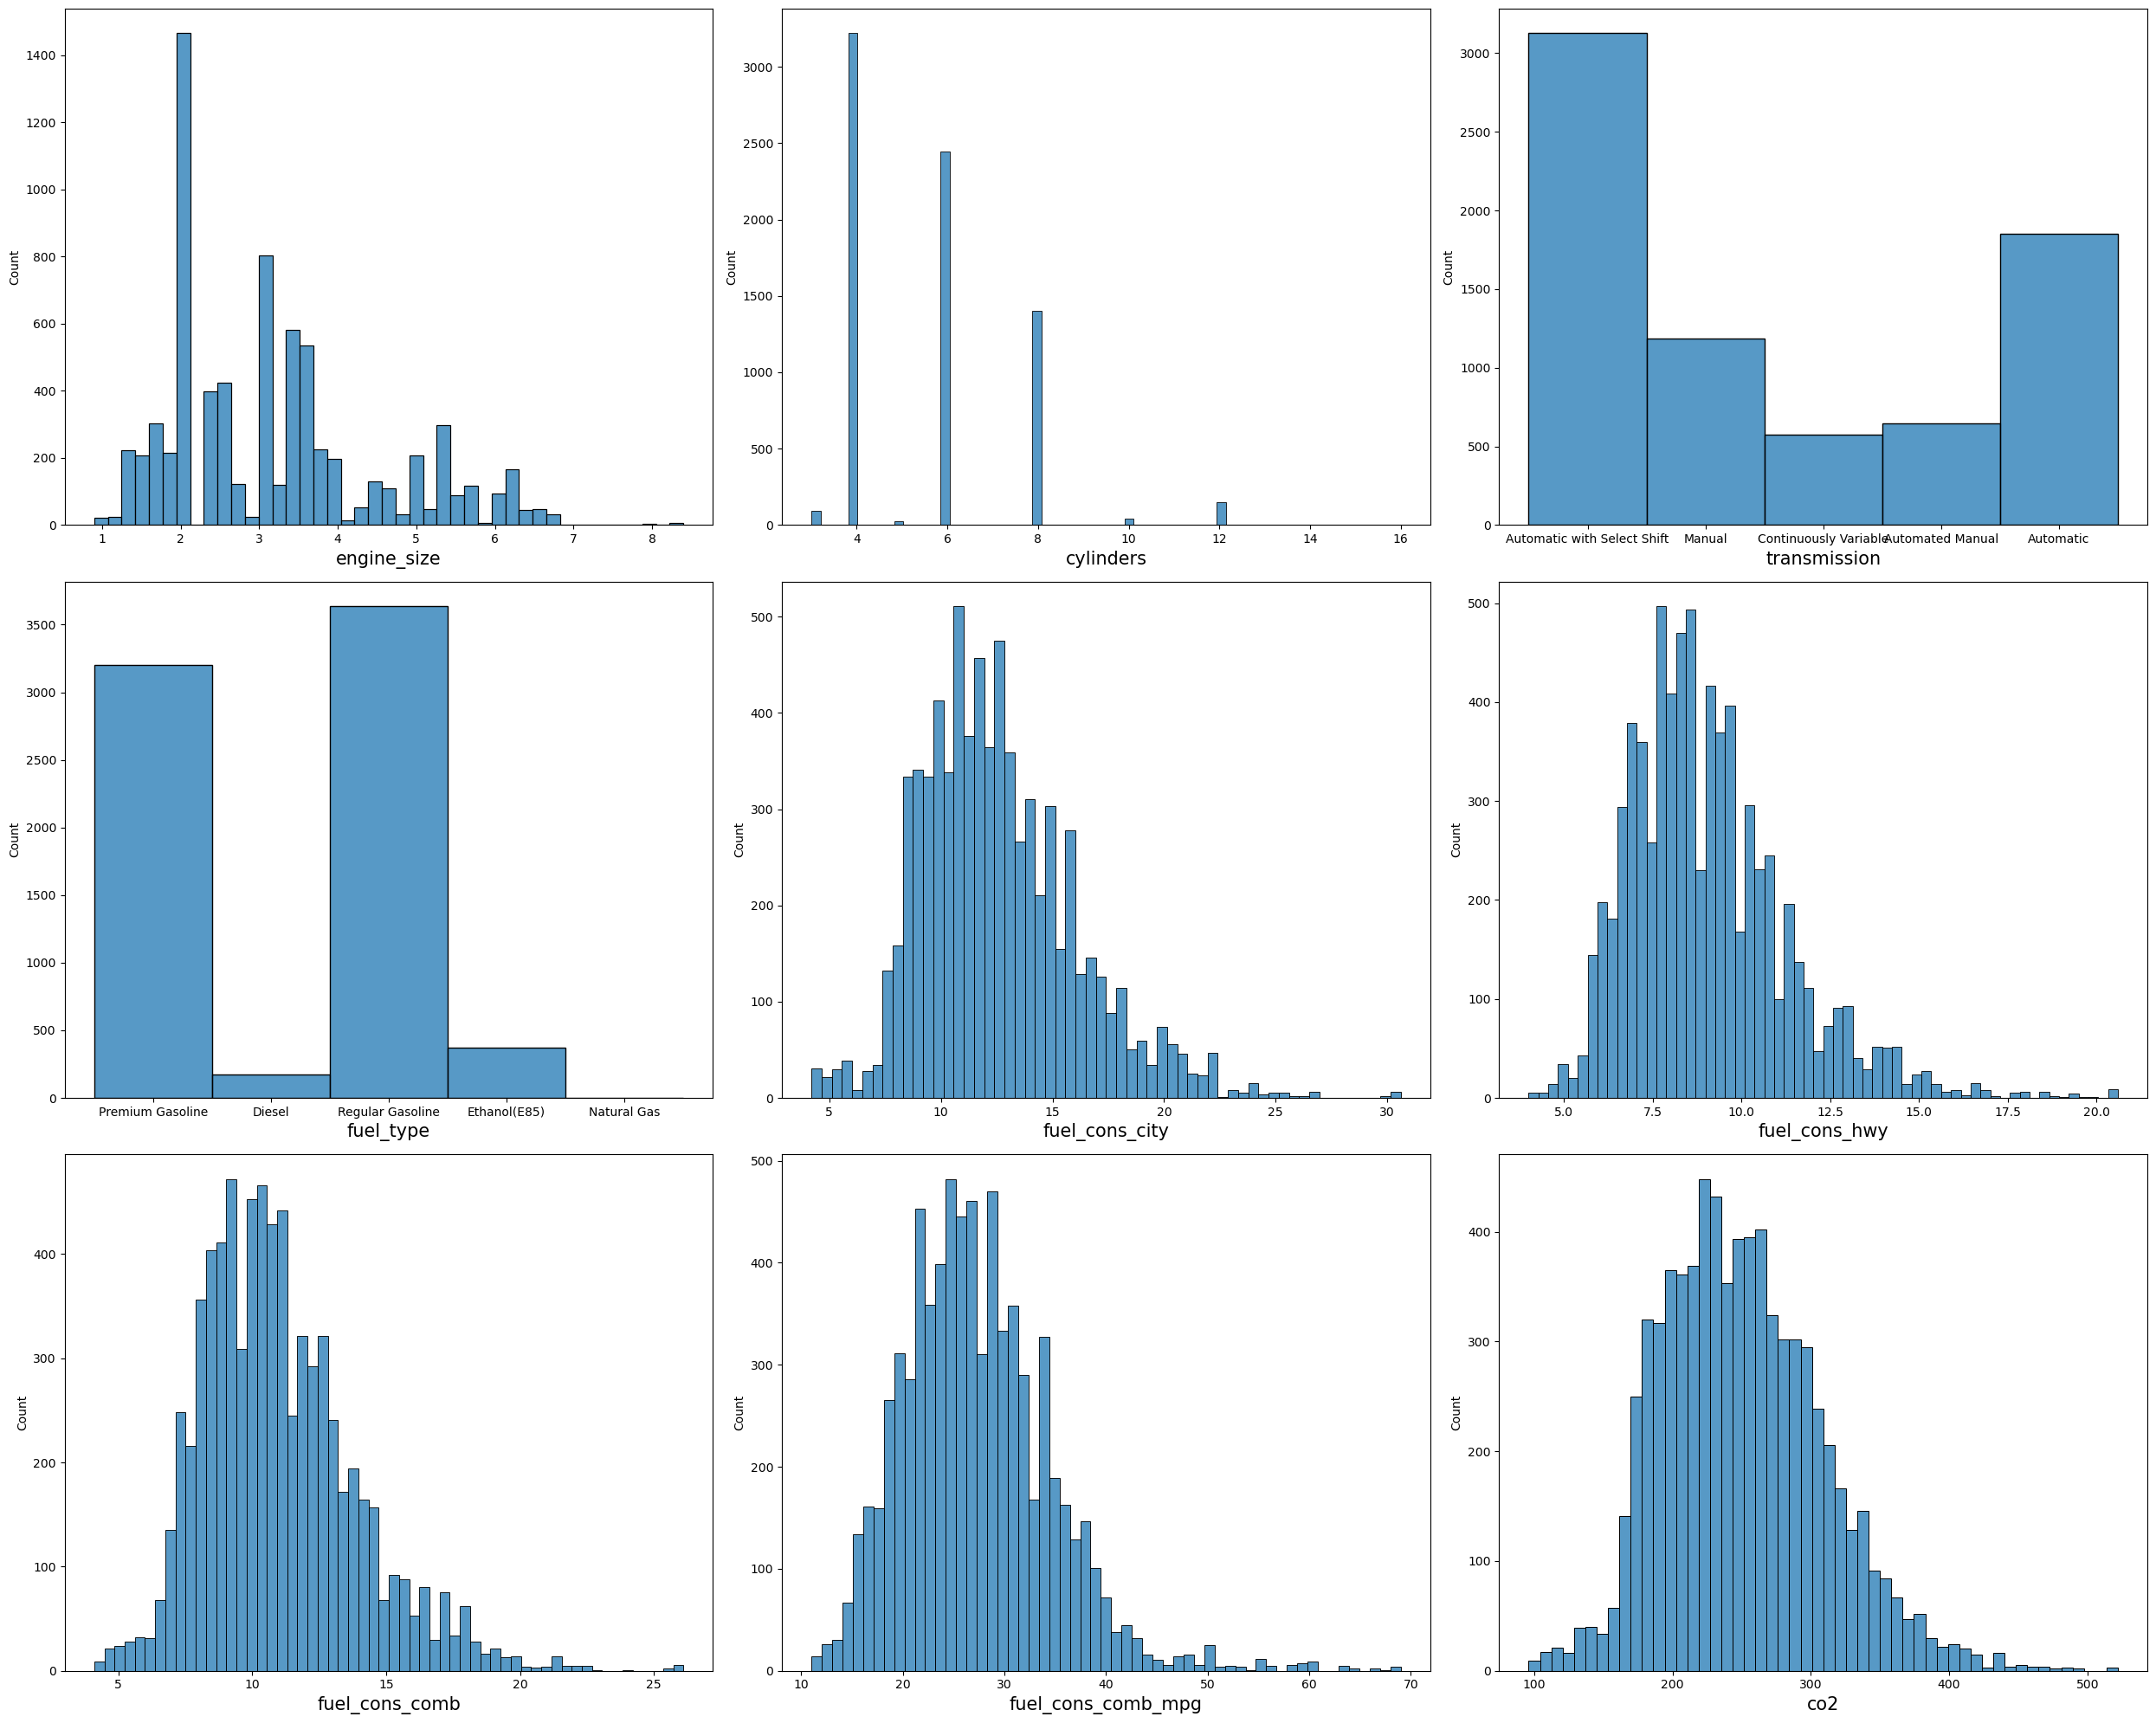

In [81]:
# Set the figure size
plt.figure(figsize=(25, 20))

# Initialize plot counter
plotnumber = 1

# Iterate over the columns of the dataframe
for col in df[df.columns[~df.columns.isin(['make', 'model','vehicle_class'])]]:
    
    # Limit the number of subplots to 12
    if plotnumber <= 9:
        
        # Create a new subplot
        ax = plt.subplot(3, 3, plotnumber)
        
        # Plot the histogram using seaborn
        sns.histplot(df[col], ax=ax)
        
        # Label the x-axis with the column name
        plt.xlabel(col, fontsize=15)
        
        # Increment the plot counter
        plotnumber += 1
    
# Adjust the layout of the subplots
plt.tight_layout()

# Display the plot
plt.show()

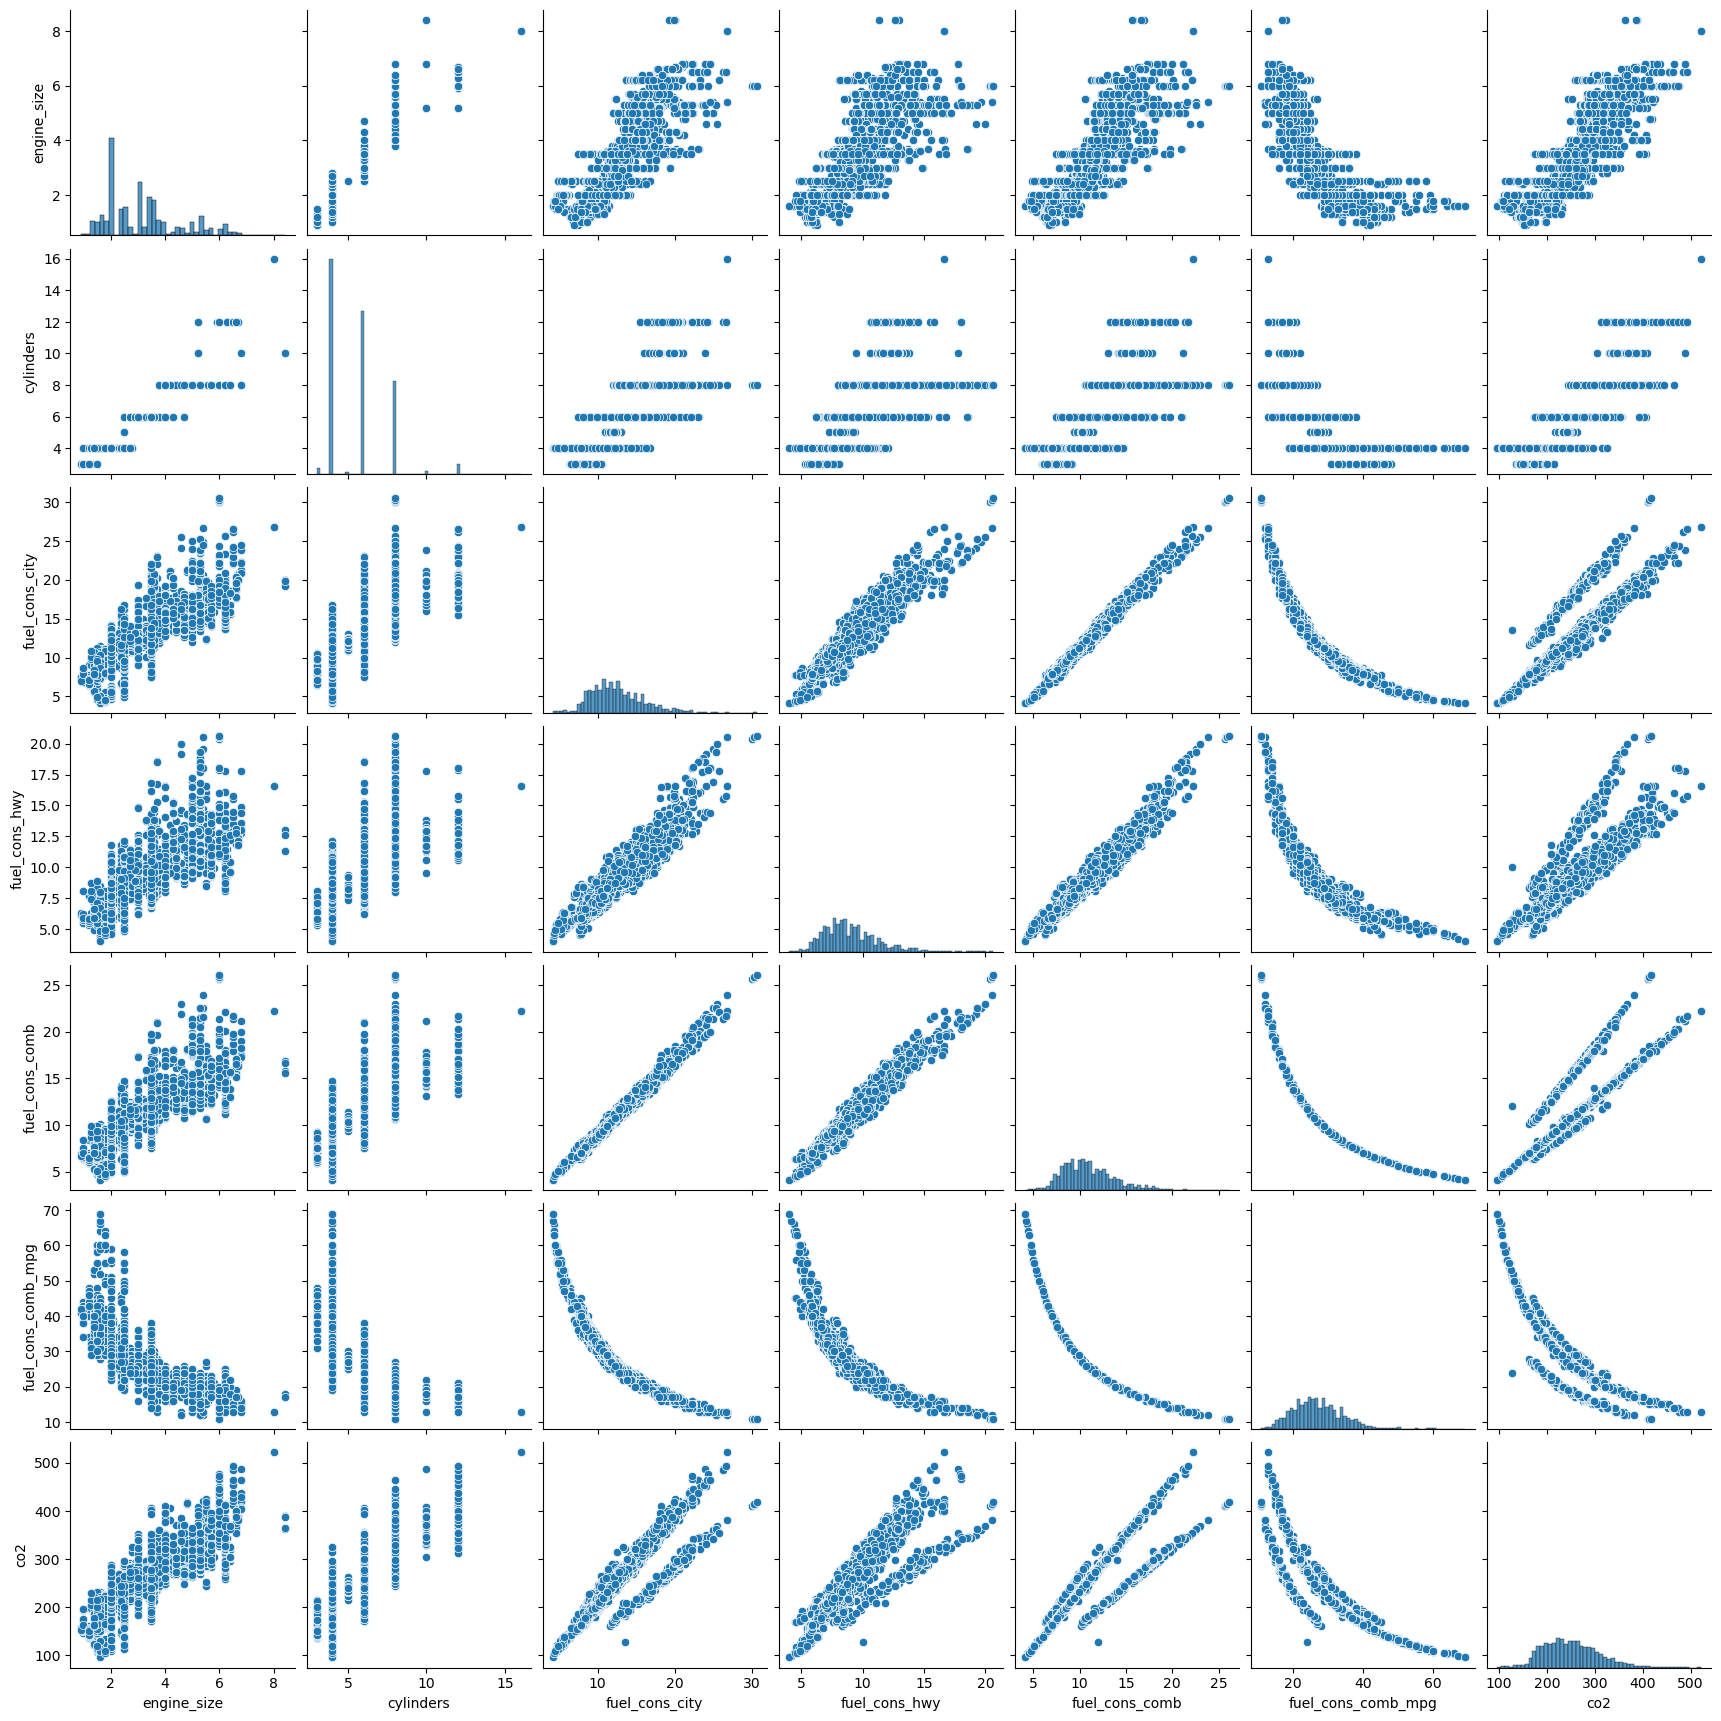

In [92]:
sns.pairplot(df)
plt.show()

### Relationship between Different Car Types and CO2 Emission

In [8]:
df.make.unique()

array(['ACURA', 'ALFA ROMEO', 'ASTON MARTIN', 'AUDI', 'BENTLEY', 'BMW',
       'BUICK', 'CADILLAC', 'CHEVROLET', 'CHRYSLER', 'DODGE', 'FIAT',
       'FORD', 'GMC', 'HONDA', 'HYUNDAI', 'INFINITI', 'JAGUAR', 'JEEP',
       'KIA', 'LAMBORGHINI', 'LAND ROVER', 'LEXUS', 'LINCOLN', 'MASERATI',
       'MAZDA', 'MERCEDES-BENZ', 'MINI', 'MITSUBISHI', 'NISSAN',
       'PORSCHE', 'RAM', 'ROLLS-ROYCE', 'SCION', 'SMART', 'SRT', 'SUBARU',
       'TOYOTA', 'VOLKSWAGEN', 'VOLVO', 'GENESIS', 'BUGATTI'],
      dtype=object)

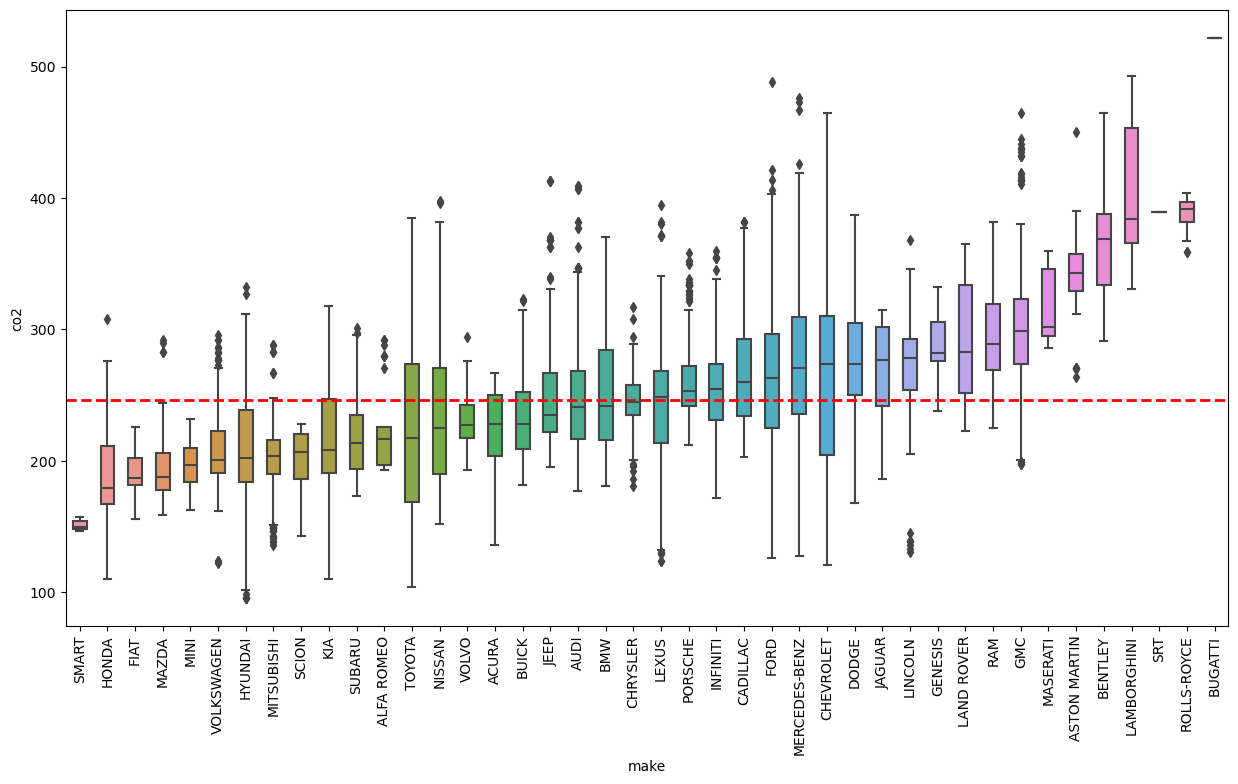

In [65]:
plt.figure(figsize=(15, 8))
order = df.groupby("make")["co2"].median().sort_values(ascending=True).index
sns.boxplot(x = df.make, y = df.co2, order=order, width=0.5)
plt.axhline(df["co2"].median(),color='r',linestyle='dashed',linewidth=2)
plt.xticks(rotation = 90)
plt.show()

In [39]:
df.make.value_counts()

FORD             577
CHEVROLET        515
BMW              501
MERCEDES-BENZ    365
PORSCHE          296
GMC              289
TOYOTA           276
AUDI             263
NISSAN           213
MINI             200
JEEP             200
KIA              192
VOLKSWAGEN       187
HYUNDAI          184
DODGE            180
HONDA            164
CADILLAC         141
LEXUS            129
MAZDA            127
SUBARU           119
JAGUAR           118
VOLVO            118
BUICK             92
INFINITI          87
LINCOLN           81
LAND ROVER        76
MITSUBISHI        73
RAM               72
CHRYSLER          64
FIAT              56
MASERATI          52
ACURA             51
ROLLS-ROYCE       48
ASTON MARTIN      39
LAMBORGHINI       37
BENTLEY           35
SCION             21
ALFA ROMEO        19
GENESIS           14
SMART              7
SRT                2
BUGATTI            2
Name: make, dtype: int64

In [10]:
df.co2.mean()

250.58469871360867

In [11]:
df[df.make.isin(["BUGATTI", "SRT"])][["make", "co2"]]

,make,co2
945,SRT,389
946,SRT,389
4509,BUGATTI,522
5575,BUGATTI,522
6640,BUGATTI,522


In [14]:
df.drop(df[(df['make']=="BUGATTI") & (df['make']=="SRT")].index, inplace=True)

#### 1. Out of the 42 car brands Ford(577) and Chevrolet(515) are the most dominating ones. Whereas cars of Smart(7), Bugati(2) and SRT(2) are the ones with lowest frequency.
#### 2. The red line signify the sample mean of co2 emissions.
#### 3. From both the bar graph and the box plot it can be inferred that average co2 emissions of cars belonging to the brand Bugati is the highest and cars of SMART has the lowest emissions.
#### 4. Almost 50% of the brand has their median co2 emissions less than the sample median of co2 emissions by all the cars.
#### 5.Though the number of Lamborghini(37),Bentley(35), Rolls-Royce(48),Aston Martin(39) are less, their co2 emission is significantly high.
#### 6. "BUGATTI", "SRT" car brands are very few in number and therefore their mean of co2 emissions are far from the mean co2 of the rest of the car model. Therefore these two cars are dropped from the dataframe


### Different Car models 

In [48]:
len(df.model.unique())

2053

In [50]:
top_models = df.model.value_counts()[:20]
top_models

F-150 FFV        32
F-150 FFV 4X4    31
MUSTANG          27
FOCUS FFV        24
F-150 4X4        20
F-150            19
SONIC 5          18
ATS              18
JETTA            18
COMPASS          18
CAMARO           17
SONIC            17
SIERRA           16
COROLLA          16
ACCORD           16
PATRIOT          16
SILVERADO        16
SILVERADO 4WD    16
TACOMA 4WD       16
SIERRA 4WD       16
Name: model, dtype: int64

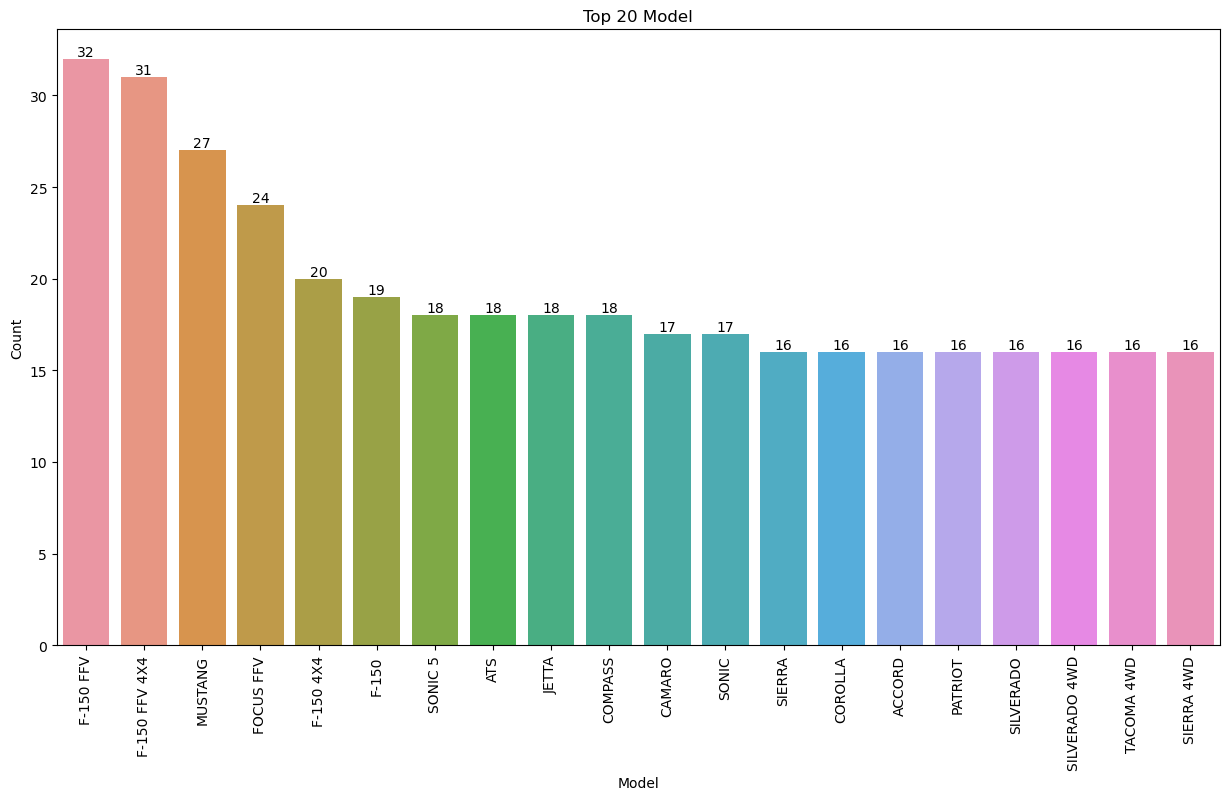

In [53]:
plt.figure(figsize=(15, 8))
a = sns.countplot(x = "model", data = df, order = top_models.index)


plt.xticks(rotation = 90)
plt.title("Top 20 Model")
plt.xlabel("Model")
plt.ylabel("Count")
plt.bar_label(a.containers[0])
plt.show()

#### 1. F-150 FFV (32) F-150 FFV (31) vehicles are the most frequent ones.

### Relationship between Different Vehicle Class and CO2 Emission

In [57]:
df.vehicle_class.value_counts()

SUV - SMALL                 1006
MID-SIZE                     983
COMPACT                      903
SUV - STANDARD               613
SUBCOMPACT                   533
FULL-SIZE                    508
PICKUP TRUCK - STANDARD      475
TWO-SEATER                   381
MINICOMPACT                  274
STATION WAGON - SMALL        214
PICKUP TRUCK - SMALL         133
VAN - PASSENGER               66
SPECIAL PURPOSE VEHICLE       65
MINIVAN                       61
STATION WAGON - MID-SIZE      45
VAN - CARGO                   22
Name: vehicle_class, dtype: int64

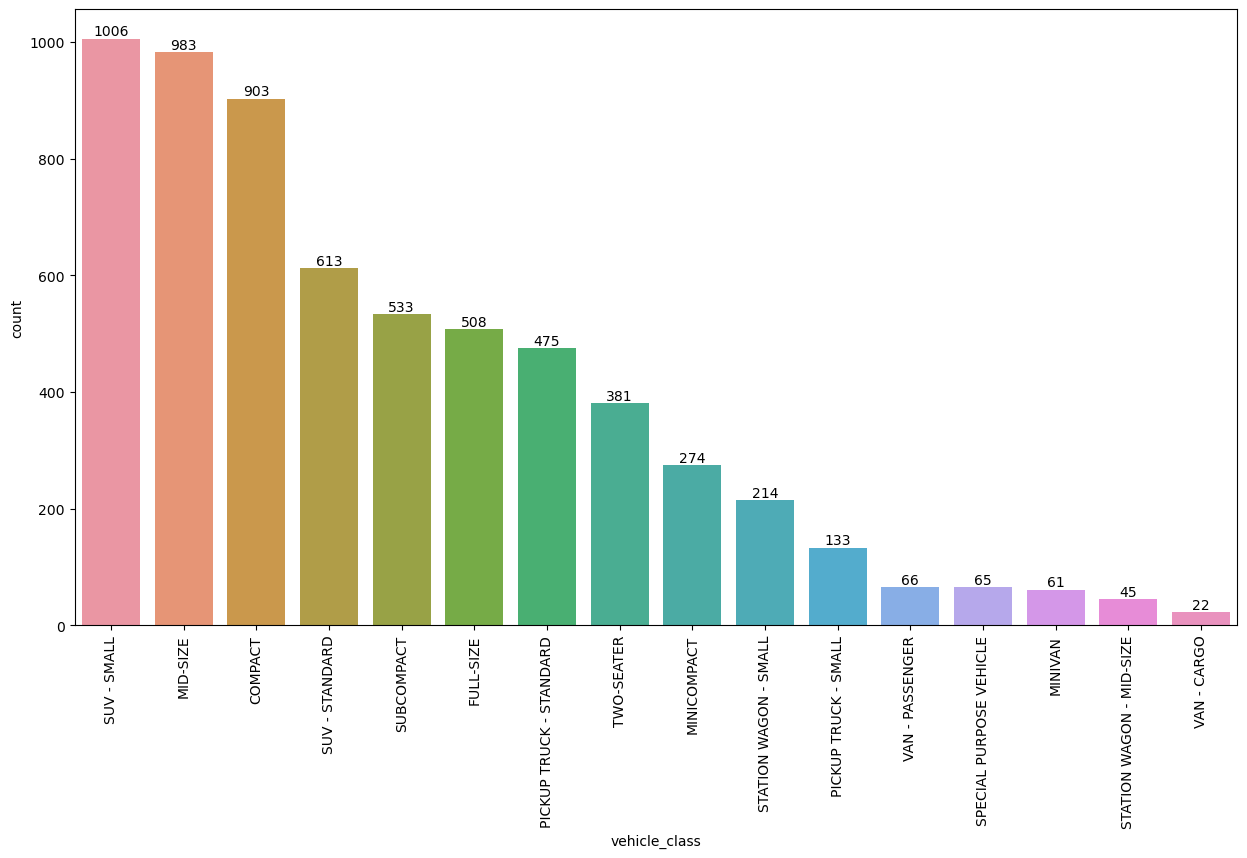

In [58]:
plt.figure(figsize=(15, 8))
a = sns.countplot(data = df, x = "vehicle_class", order = df.vehicle_class.value_counts().index)

plt.xticks(rotation = 90)
plt.bar_label(a.containers[0])

plt.show()

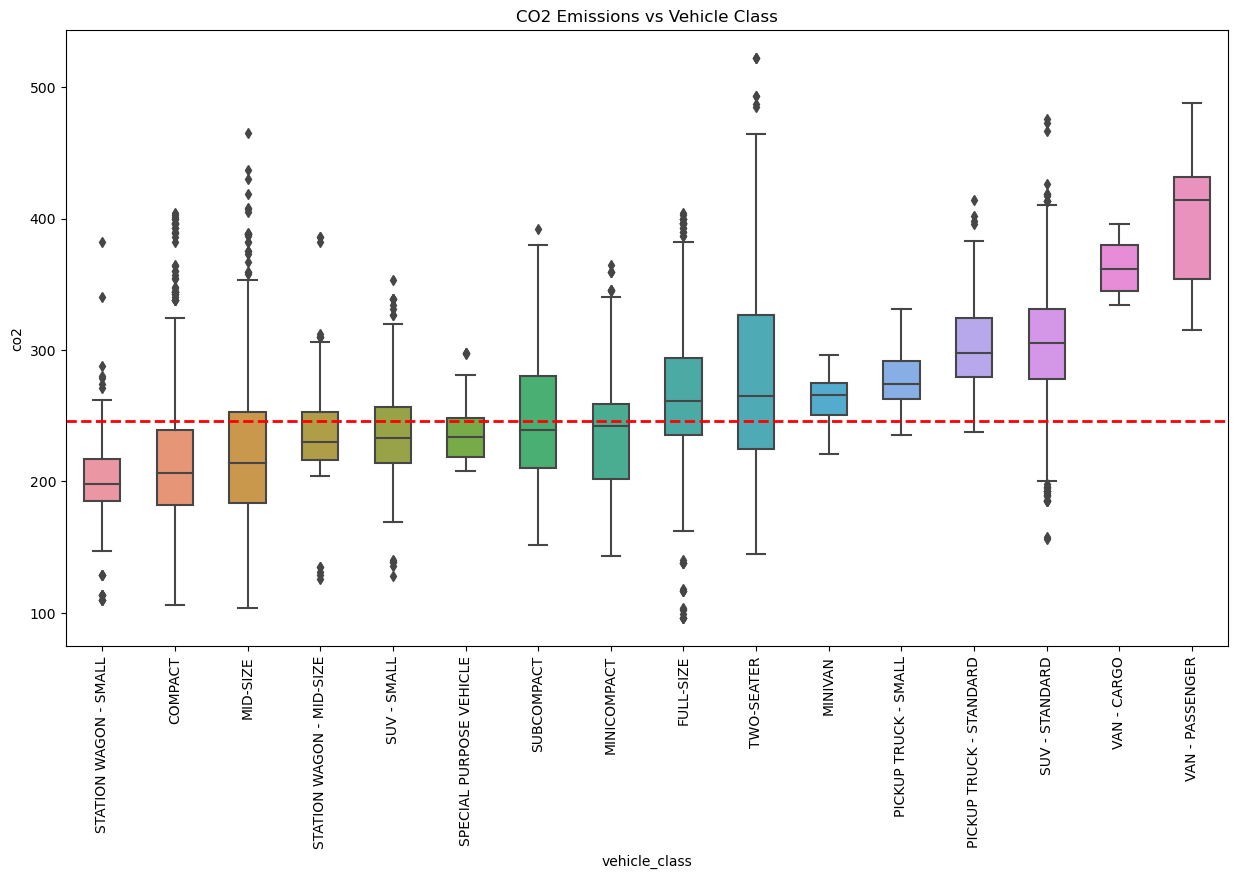

In [85]:
plt.figure(figsize=(15, 8))
order = df.groupby("vehicle_class")["co2"].median().sort_values(ascending=True).index
sns.boxplot(x = df.vehicle_class, y = df.co2, data = df, order=order, width=0.5)
plt.axhline(df["co2"].median(),color='r',linestyle='dashed',linewidth=2)
plt.title("CO2 Emissions vs Vehicle Class")
plt.xticks(rotation = 90)
plt.show()

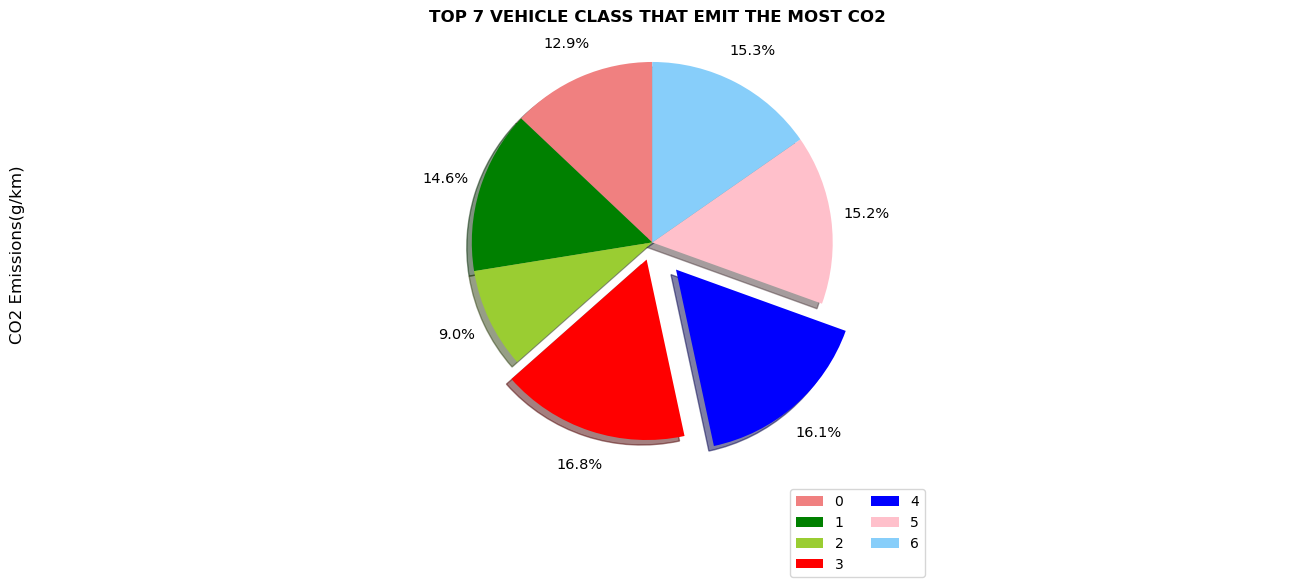

In [90]:
df["co2"].head(7).plot(kind = "pie", figsize = (13, 6),colors = ["lightcoral", "green", "yellowgreen", "red", "blue", "pink", "lightskyblue"],
                                       shadow = True, explode = [0, 0, 0, 0.1, 0.2, 0, 0], 
                                       autopct = "%.1f%%", textprops = {"fontsize":10.5} ,
                                       labels = None, startangle = 90,
                                       pctdistance = 1.2)
plt.title("TOP 7 VEHICLE CLASS THAT EMIT THE MOST CO2", fontsize = "large", fontweight = "bold", y = 1.03)
plt.legend(df.index, ncol = 2, loc = "best", bbox_to_anchor=(0.72, -0.04), fontsize = 'medium')
plt.ylabel("CO2 Emissions(g/km)", fontsize = "large")

plt.axis("equal")
plt.tight_layout()
plt.show()

#### 1. SUV-Small(1006) and MID-Size(983) vehicles are the most frequent vehicle class.
#### 2. Though the number of Van Passenger is less(66) but the co2 emission is quite on the higher side.
#### 3. The vehicle of class VAN-Passenger followed by VAN-Cargo has the highest co2 emissions among all. And Station Wagon-Small has the lowest co2 emissions.
#### 4. There are 8 types of vehicle class out of 16 which has a median co2 emissions less than sample median of co2 emissions and the other 8 has a higher median.

### Relationship between Engine_size and CO2 Emission

In [63]:
print(sorted(df.engine_size.unique()))

[0.9, 1.0, 1.2, 1.3, 1.4, 1.5, 1.6, 1.8, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.7, 2.8, 2.9, 3.0, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 4.0, 4.2, 4.3, 4.4, 4.6, 4.7, 4.8, 5.0, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 8.0, 8.4]


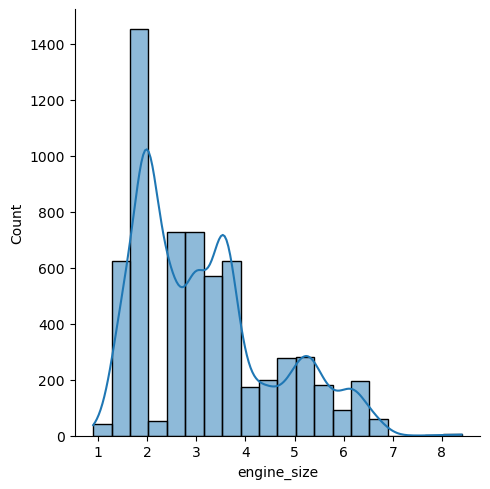

In [67]:
sns.displot(data = df, x = "engine_size", kde = True, bins = 20);

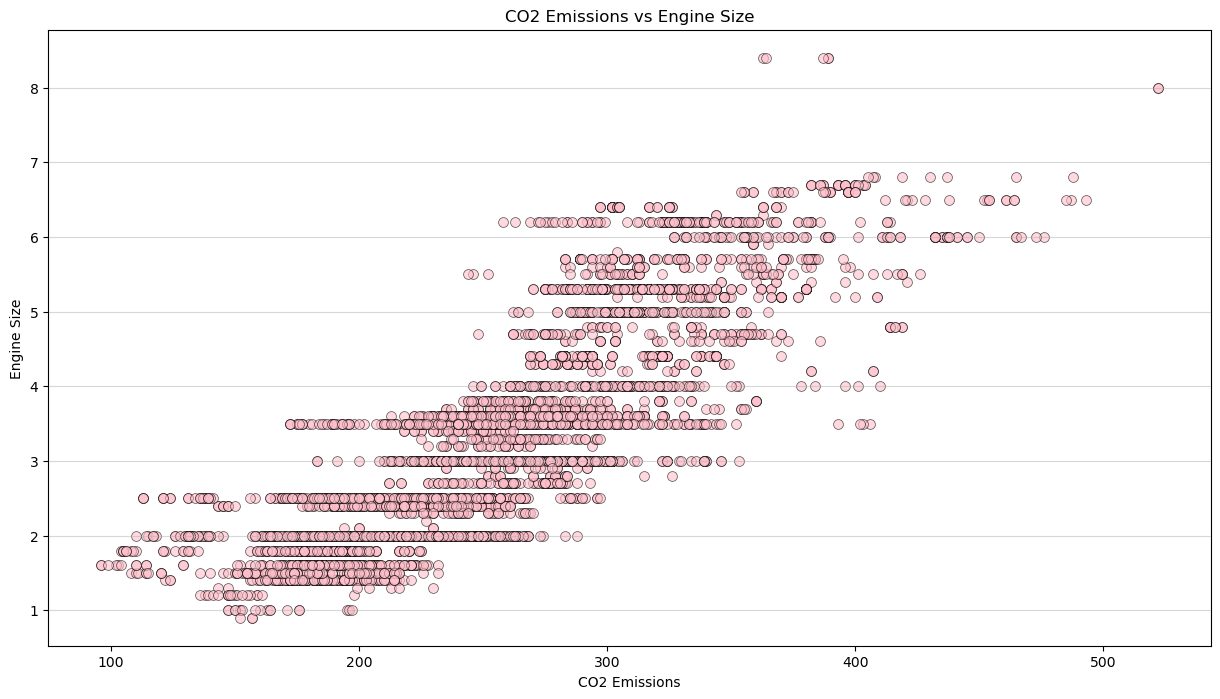

In [68]:
sns.scatterplot(data = df, x = "co2", y = "engine_size", alpha = 0.6, color = "pink" , edgecolor = "k", s = 50)
plt.xlabel("CO2 Emissions")
plt.ylabel("Engine Size")
plt.title("CO2 Emissions vs Engine Size")
plt.grid(axis = "y", alpha = 0.5)
plt.show()

#### Releationship between engine size and co2 emission are directly proportional to each other

### Relationship between Different Cylinder numbers and CO2 Emission

In [70]:
df.cylinders.value_counts()

4     2749
6     2040
8     1202
12     135
3       88
10      40
5       26
16       2
Name: cylinders, dtype: int64

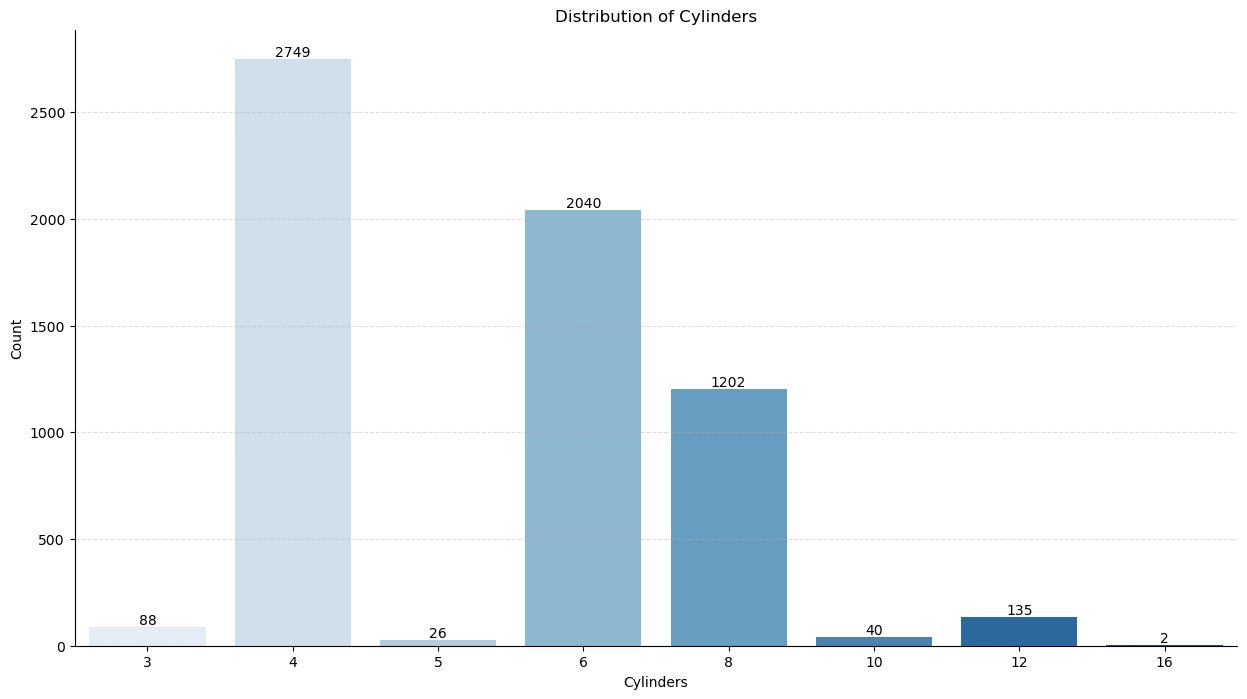

In [72]:
a = sns.countplot(data = df, x = df.cylinders, palette = "Blues")
plt.bar_label(a.containers[0])
plt.xlabel("Cylinders")
plt.ylabel("Count")
plt.title("Distribution of Cylinders")
plt.grid(axis = "y", linestyle = "--", alpha = 0.4)
sns.despine() 
plt.show()

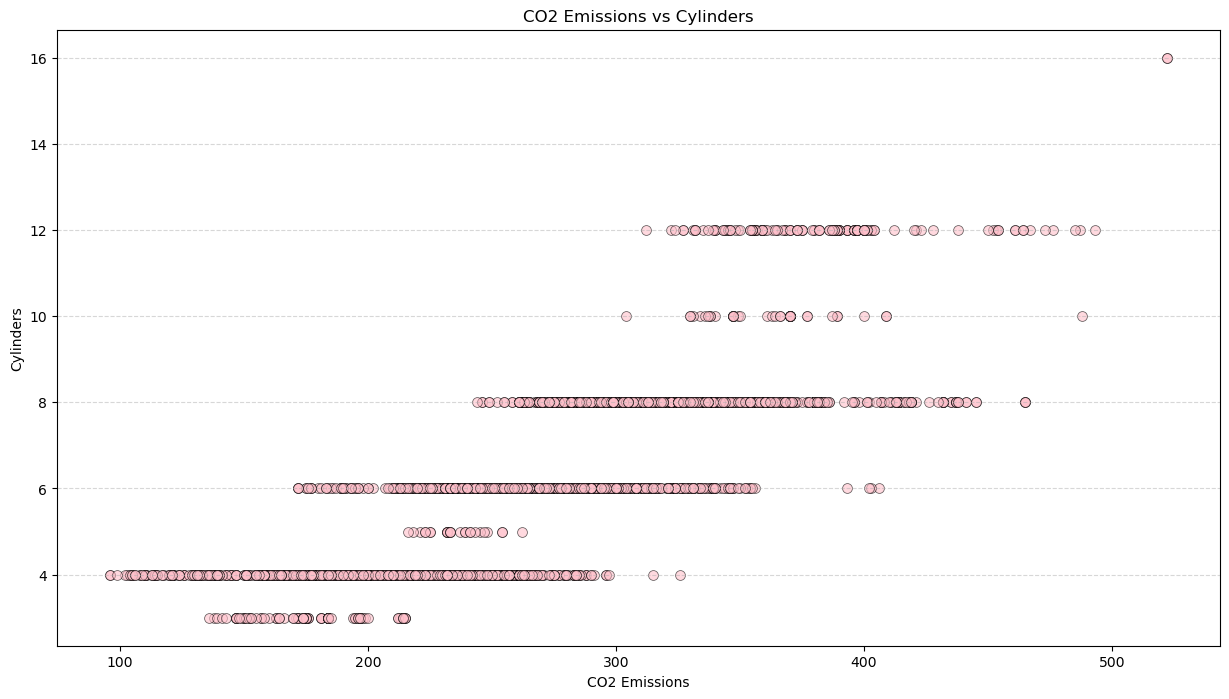

In [73]:
sns.scatterplot(data = df, x = "co2", y = "cylinders", alpha = 0.6, color = "pink" , edgecolor = "k", s = 50)
plt.xlabel("CO2 Emissions")
plt.ylabel("Cylinders")
plt.title("CO2 Emissions vs Cylinders")
plt.grid(axis = "y", alpha = 0.5, linestyle = "--")
plt.show()

#### The number of cylinders and the co2 emission are almost directly proportional to each other

### Relationship between Number of Gears/Transmission and CO2 Emission

In [74]:
df["transmission"] = np.where(df["transmission"].isin(["A4", "A5", "A6", "A7", "A8", "A9", "A10"]), "Automatic", df["transmission"])
df["transmission"] = np.where(df["transmission"].isin(["AM5", "AM6", "AM7", "AM8", "AM9"]), "Automated Manual", df["transmission"])
df["transmission"] = np.where(df["transmission"].isin(["AS4", "AS5", "AS6", "AS7", "AS8", "AS9", "AS10"]), "Automatic with Select Shift", df["transmission"])
df["transmission"] = np.where(df["transmission"].isin(["AV", "AV6", "AV7", "AV8", "AV10"]), "Continuously Variable", df["transmission"])
df["transmission"] = np.where(df["transmission"].isin(["M5", "M6", "M7"]), "Manual", df["transmission"])

In [75]:
df.transmission.value_counts()

Automatic with Select Shift    3127
Automatic                      1851
Manual                         1185
Automated Manual                646
Continuously Variable           576
Name: transmission, dtype: int64

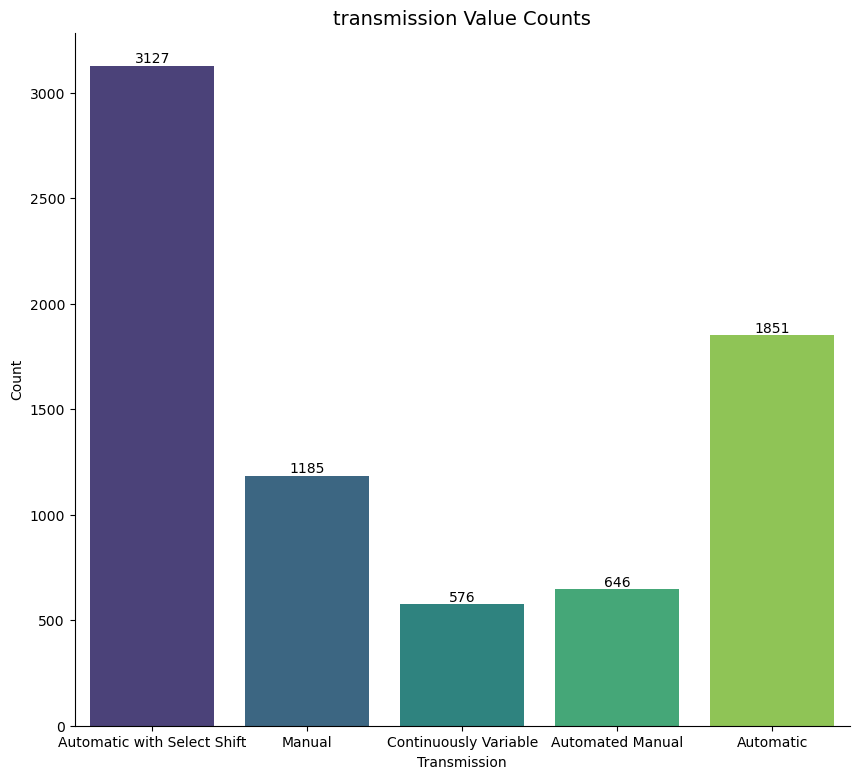

In [78]:
plt.figure(figsize = (10, 9))
a = sns.countplot(data = df, x = "transmission", palette = "viridis")

plt.bar_label(a.containers[0])
plt.title("transmission Value Counts", fontsize = 14)
plt.xlabel("Transmission")
plt.ylabel("Count")
sns.despine()

plt.show()

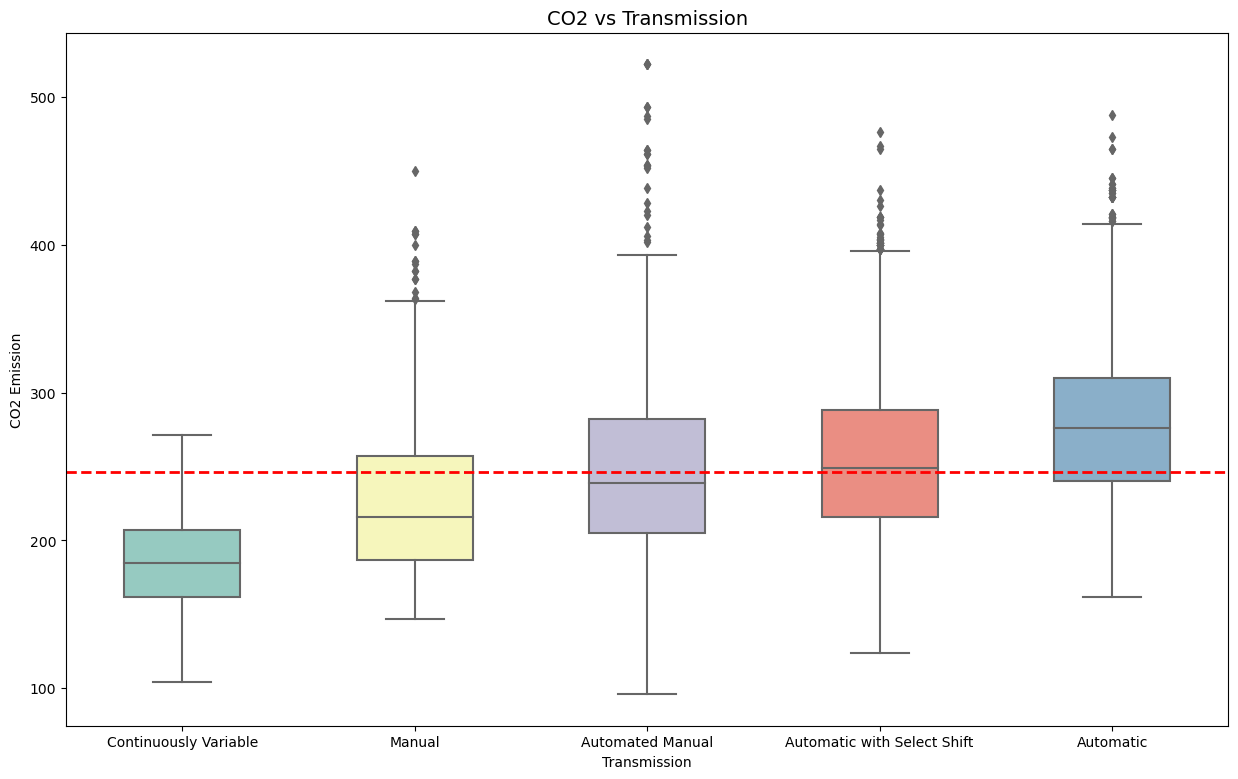

In [80]:
plt.figure(figsize = (15, 9))
order = df.groupby("transmission")["co2"].median().sort_values(ascending=True).index
sns.boxplot(x = "transmission", y = "co2", data = df, palette = 'Set3', order=order, width=0.5)
plt.axhline(df["co2"].median(),color='r',linestyle='dashed',linewidth=2)

plt.title("CO2 vs Transmission", fontsize = 14)
plt.xlabel("Transmission")
plt.ylabel("CO2 Emission")

plt.show()

#### 1. Vehicles with Automatic transmission exhibit highest co2 emissions and vehicle with Continuously Variable Transmission shows the lowest co2 emissions.
#### 2. Median co2 emissions of Automated Manual and Automatic with Select Shift vehicles is almost similar to that of sample median co2 emissions.

### Relationship between Different Fuel types and CO2 Emission

In [79]:
df.fuel_type.value_counts()

X    3039
Z    2765
E     330
D     147
N       1
Name: fuel_type, dtype: int64

In [39]:
df["fuel_type"] = np.where(df["fuel_type"]=="Z", "Premium Gasoline", df["fuel_type"])
df["fuel_type"] = np.where(df["fuel_type"]=="X", "Regular Gasoline", df["fuel_type"])
df["fuel_type"] = np.where(df["fuel_type"]=="D", "Diesel", df["fuel_type"])
df["fuel_type"] = np.where(df["fuel_type"]=="E", "Ethanol(E85)", df["fuel_type"])
df["fuel_type"] = np.where(df["fuel_type"]=="N", "Natural Gas", df["fuel_type"])

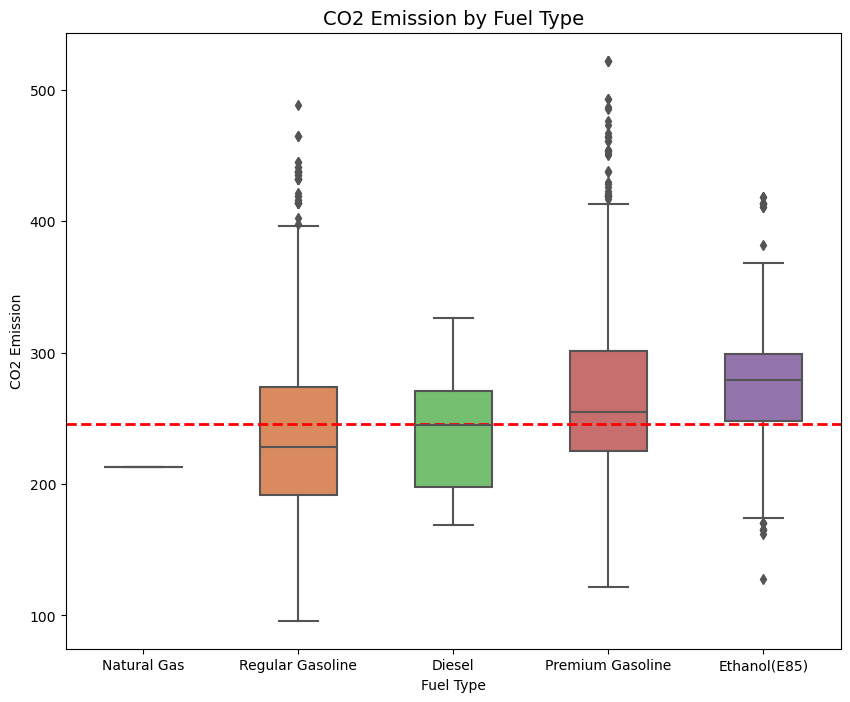

In [71]:
plt.figure(figsize = (10, 8))
order = df.groupby("fuel_type")["co2"].median().sort_values(ascending=True).index
sns.boxplot(x = "fuel_type", y = "co2", data = df, palette = "muted", order=order, width=0.5)
plt.axhline(df["co2"].median(),color='r',linestyle='dashed',linewidth=2)

plt.title("CO2 Emission by Fuel Type", fontsize = 14)
plt.xlabel("Fuel Type")
plt.ylabel("CO2 Emission")

plt.show()

#### 1. Cars running on Ethanol(E85) has the highest CO2 emissions with almost all the values hisger than the sample median CO2 emissions.
#### 2. Natural Gas has the lowest CO2 emissions, but there is only one vehicle that use it as fuel. Other than that Regular Gasoline has the lowest CO2 emissions with almost 75% values less than sample median.
#### 3. The median CO2 emissions of fuel type Premiuim Gasoline and Diesel has almost similar median to that of the sample median.

### Correlation between different numeric matrix and CO2 Emission

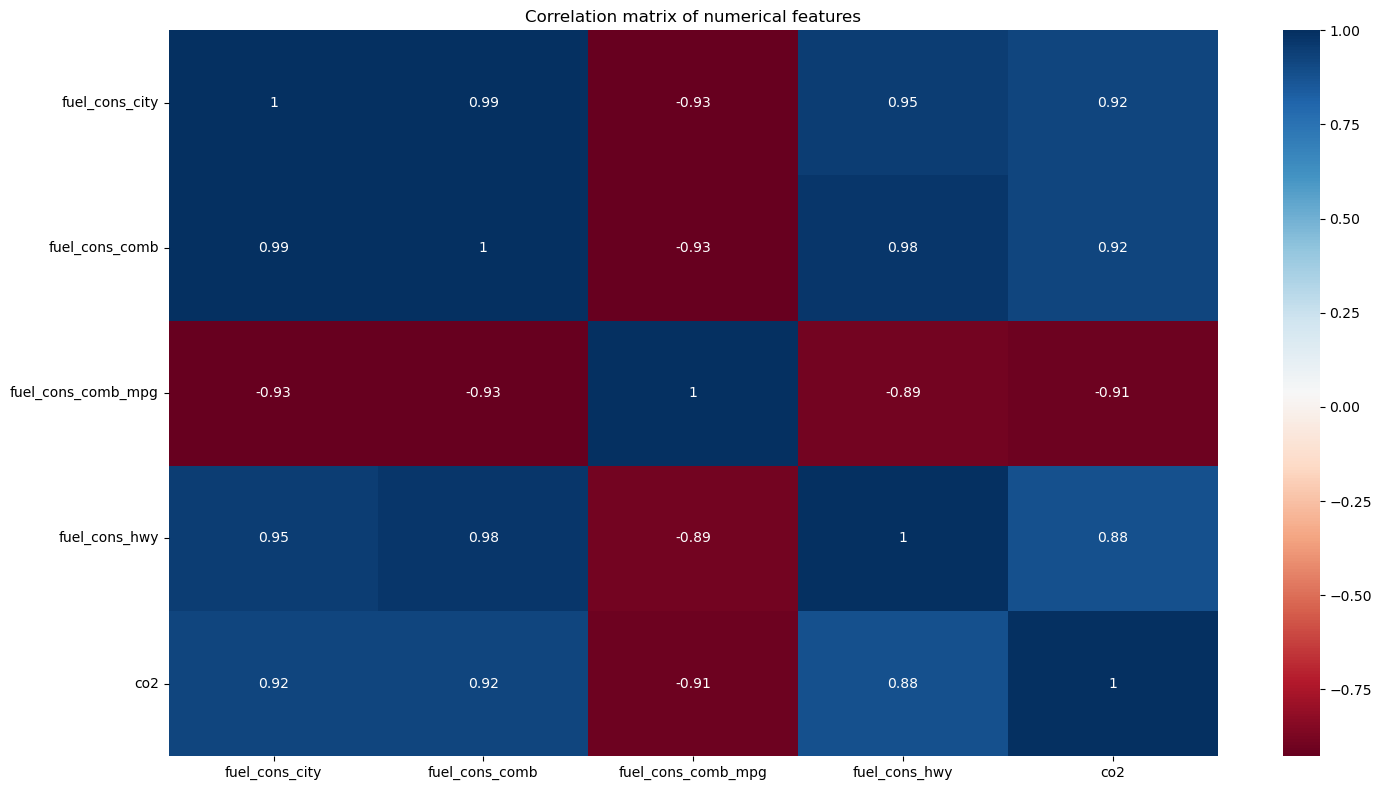

In [30]:
sns.heatmap(df[["fuel_cons_city", "fuel_cons_comb", "fuel_cons_comb_mpg", "fuel_cons_hwy","co2"]].corr(),  cmap="RdBu", annot = True)
plt.title("Correlation matrix of numerical features")
plt.tight_layout()
plt.show()

#### 1. fuel_cons_comb (mpg) is negatively correlated to all the features.
#### 2. All the other features are postively correlated with each other.
#### 3. Both fuel_cons_city and fuel_cons_hwy have very strong positive correlation of 0.99 and 0.98 with fuel_cons_comb, since fuel_cons_comb is redundant.
#### 4. Our dependent variable co2 Emissions has highest positive correlation of 0.92 with fuel_cons_city and fuel_cons_comb and strong negative correlation of -0.91 with fuel_cons_comb.

### Distribution curve of co2

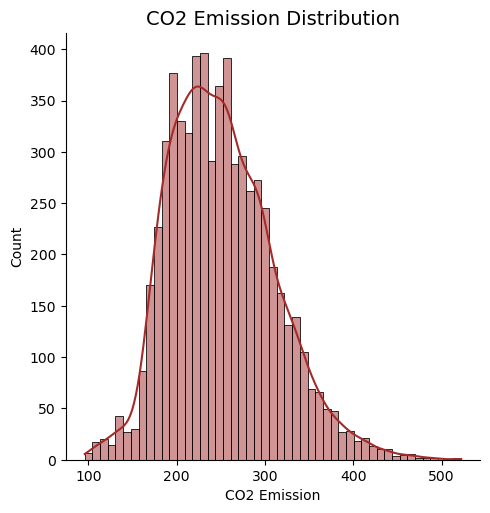

In [82]:
sns.displot(df.co2, kde = True, color = "brown")

plt.title("CO2 Emission Distribution", fontsize = 14)
plt.xlabel("CO2 Emission")
plt.ylabel("Count")

plt.show()

### statistical distribution of different numerical variables

In [88]:
from tabulate import tabulate
stats_ = df.describe().T.drop(["count"], axis=1)
stats_ = pd.concat([stats_, df.skew()], axis=1)
stats_.columns = ["mean", "std", "min", "25%", "median", "75%", "max", "skew"]
cols = ["mean", "25%", "median", "75%", "std", "skew", "min", "max"]
stats_ = stats_[cols]
print(tabulate(stats_, headers="keys", floatfmt=".2f"))

                      mean     25%    median     75%    std    skew    min     max
------------------  ------  ------  --------  ------  -----  ------  -----  ------
engine_size           3.16    2.00      3.00    3.70   1.35    0.81   0.90    8.40
cylinders             5.62    4.00      6.00    6.00   1.83    1.11   3.00   16.00
fuel_cons_city       12.56   10.10     12.10   14.60   3.50    0.81   4.20   30.60
fuel_cons_hwy         9.04    7.50      8.70   10.20   2.22    1.08   4.00   20.60
fuel_cons_comb       10.98    8.90     10.60   12.60   2.89    0.89   4.10   26.10
fuel_cons_comb_mpg   27.48   22.00     27.00   32.00   7.23    0.98  11.00   69.00
co2                 250.58  208.00    246.00  288.00  58.51    0.53  96.00  522.00


#### 1. The range of our target co2 Emissions is between 96 and 522.
#### 2. Mean co2 emissions is 250.58 and median is 246.
#### 3. 25% of the sample points has co2 emissions within 208 and 75% has within 288.
#### 4. All the features are positively skewed.
#### 5. cylinders and fuel_cons_hwy seems significantly more skewed than the other features.
#### 6. co2 Emissions is the least skewed feature.
#### 7. Other than the regressor feature, among the predictors engine_size and fuel_cons_ city  are the least skewed features.

# Get columns with object values.

In [83]:
target = []
for i in df.columns:
    col = df[i]
    if type(col[0]) == str:
        target.append(i)
        print(i)

make
model
vehicle_class
transmission
fuel_type


## Converting object values to int.

In [84]:
from sklearn.preprocessing import LabelEncoder
for i in target:
    encoder = LabelEncoder()
    encoder.fit(list(df[i]))
    df[i] = encoder.fit_transform(df[i])

## Features selection

In [85]:
X = df.drop("co2", axis=1)
y = df["co2"]

In [86]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

## Linear Regression

In [87]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression().fit(x_train, y_train)

In [88]:
y_predLR = LR.predict(x_test)

In [89]:
from sklearn.metrics import r2_score

accLR = r2_score(y_test, y_predLR)
accLR

0.9163687526044482

## RandomForest

In [90]:
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor(n_estimators = 50, max_depth = 15, random_state = 55, n_jobs=-1).fit(x_train, y_train)

In [91]:
y_predRF = RF.predict(x_test)

In [92]:
accRF = r2_score(y_test,y_predRF)
accRF

0.9968940650502859

## KNN

In [93]:
from sklearn.neighbors import KNeighborsRegressor

KNN = KNeighborsRegressor(n_neighbors=7).fit(x_train, y_train)

In [94]:
y_predKNN = KNN.predict(x_test)

In [95]:
accKNN = r2_score(y_test, y_predKNN)
accKNN

0.8967418009944318

## DecisionTree.

In [96]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor(max_depth=15, random_state=20).fit(x_train, y_train)

In [97]:
y_predDT = DT.predict(x_test)

In [98]:
accDT = r2_score(y_test, y_predDT)
accDT

0.99645258574286

## All models accuracy

In [100]:
allacc = pd.DataFrame(columns=["Accuracy"], index=["Linear Regression", "Random Forest",
                                                  "KNN","Decision Tree"])
models = {'Linear Regression' : LR, 'Random Forest' : RF, 'KNN' : KNN, 'Decision Tree' : DT}

for name, model in models.items() :
  allacc.loc[name, 'Accuracy'] = r2_score(y_test, y_pred = model.predict(x_test))

In [101]:
allacc

,Accuracy
Linear Regression,0.916369
Random Forest,0.996894
KNN,0.896742
Decision Tree,0.996453


<AxesSubplot:title={'center':'Final models accuracy'}>

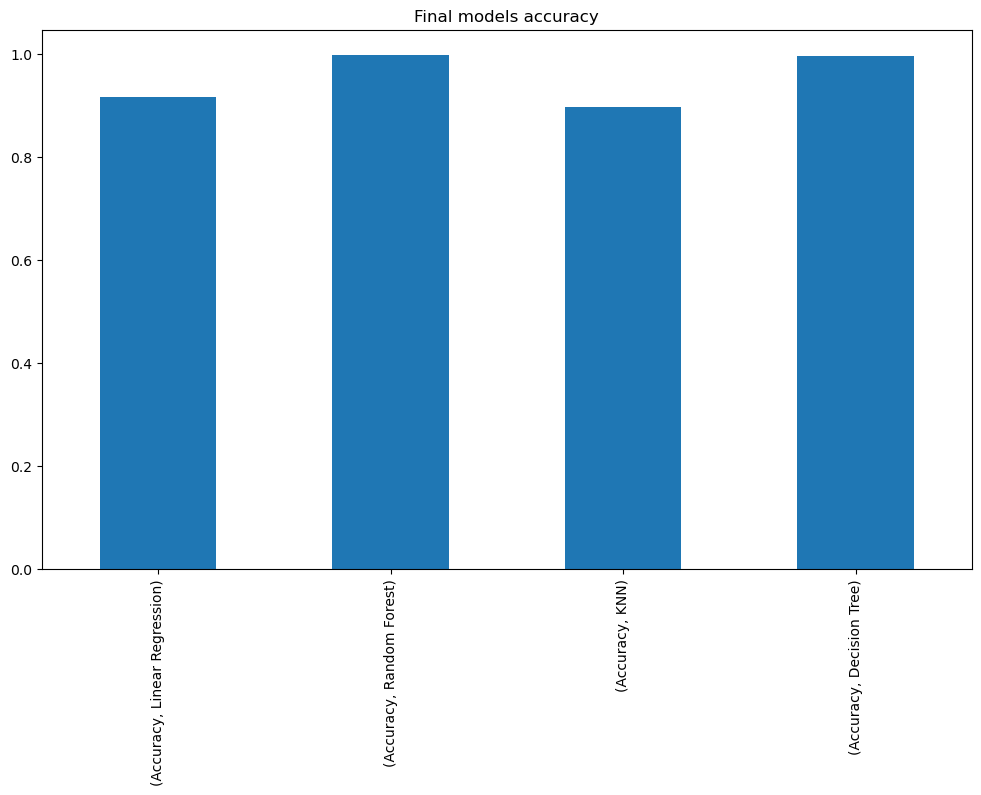

In [102]:
allacc.unstack().plot(kind = 'bar', stacked = True, figsize = (12, 7), title = 'Final models accuracy')